In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de los gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar el dataset
df = pd.read_csv('Datos_Cleaned.csv')

# Vista general
df.head()

,AÑO,CÓDIGO_MUNICIPIO,MUNICIPIO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,CÓDIGO_ETC,ETC,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,...,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2023,5001,Medellín,5,Antioquia,3759.0,Medellín,377562,96.15,95.94,...,9.23,0.15,6.21,15.40,7.27,9.25,1.82,8.34,13.69,4.48
1,2023,5002,Abejorral,5,Antioquia,3758.0,Antioquia (ETC),3634,74.38,74.38,...,7.77,0.56,7.26,10.93,4.41,9.07,1.67,10.28,11.32,2.20
2,2023,5004,Abriaquí,5,Antioquia,3758.0,Antioquia (ETC),503,62.62,62.62,...,6.55,0.00,1.96,16.51,2.04,9.52,0.00,10.46,13.76,2.04
3,2023,5021,Alejandría,5,Antioquia,3758.0,Antioquia (ETC),864,81.37,81.37,...,7.88,0.00,7.02,13.65,2.40,7.20,1.59,7.69,11.65,0.00
4,2023,5030,Amagá,5,Antioquia,3758.0,Antioquia (ETC),5060,78.30,78.30,...,10.71,0.00,9.63,16.48,5.50,12.08,0.29,11.54,18.48,3.98


In [5]:
# Convertir a entero si es necesario
df['AÑO'] = df['AÑO'].astype(int)

# Filtrar la última década
df_decada = df[df['AÑO'] >= 2013]

# Verificar los años disponibles
df_decada['AÑO'].unique()

array([2023, 2019, 2020, 2017, 2021, 2022, 2013, 2014, 2015, 2016, 2018])

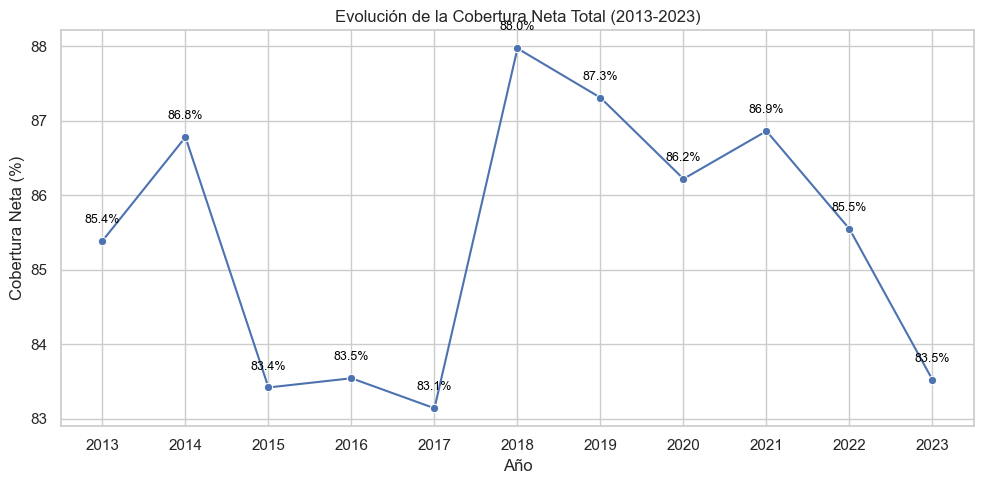

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 1: Agrupar por año y sacar el promedio
df_agg = df_decada.groupby('AÑO')['COBERTURA_NETA'].mean().reset_index()

# Paso 2: Graficar línea con un punto por año para ver la evolución prom de cob. neta
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agg, x='AÑO', y='COBERTURA_NETA', marker='o', errorbar=None)

# Paso 3: Nombre gráfico, Ajustar ejes y validar años decada
plt.title('Evolución de la Cobertura Neta Total (2013-2023)')
plt.xlabel('Año')
plt.ylabel('Cobertura Neta (%)')
plt.xticks(ticks=range(2013, 2024))  # Mostrar todos los años

# Paso 4: Agregar etiquetas en cada punto y sumarle +0.2 al valor y para que no se superponga al punto
for i, row in df_agg.iterrows():
    plt.text(row['AÑO'], row['COBERTURA_NETA'] + 0.2,
             f"{row['COBERTURA_NETA']:.1f}%",
             ha='center', va='bottom', fontsize=9, color='black')

#Mostrar gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


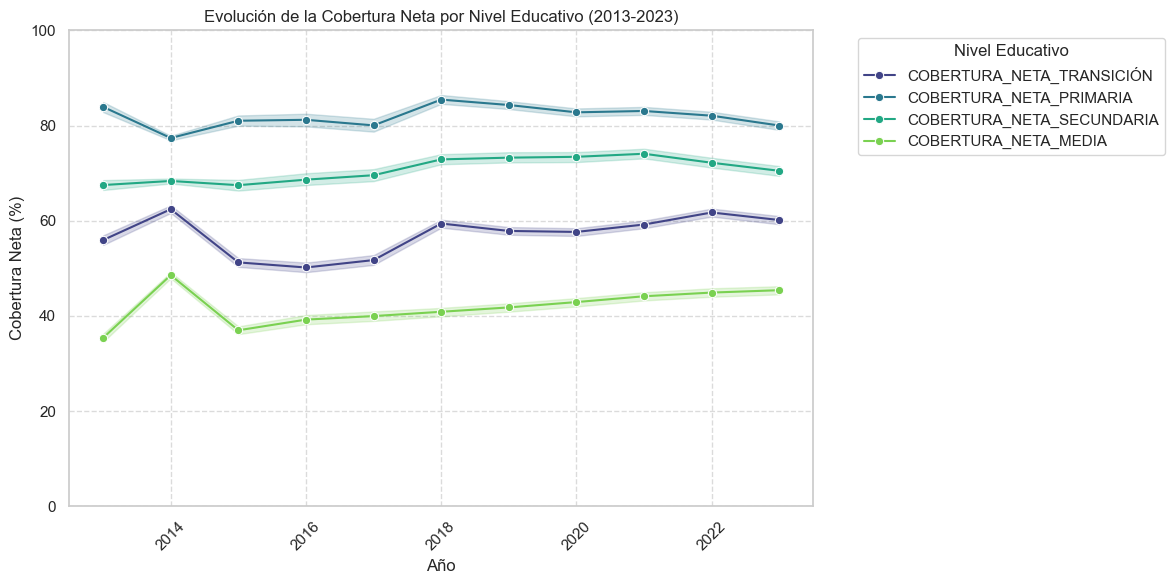

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Seleccionar columnas relevantes
niveles = [
    'COBERTURA_NETA_TRANSICIÓN',  
    'COBERTURA_NETA_PRIMARIA', 
    'COBERTURA_NETA_SECUNDARIA', 
    'COBERTURA_NETA_MEDIA'
]

# Verificar que las columnas existan en el DataFrame
columnas_disponibles = df_decada.columns.tolist()
columnas_a_usar = ['AÑO'] + [col for col in niveles if col in columnas_disponibles]

# 2. Filtrar el DataFrame sólo con las columnas Año y nieveles (Copia del dataframe original)
df_niveles = df_decada[columnas_a_usar].copy()

# 3. Transformación de formato ancho a largo para que cada fila represente un año, un nivel educativo y su cobertura
df_melted = df_niveles.melt(
    id_vars='AÑO',  # Con tilde
    var_name='Nivel Educativo', 
    value_name='Cobertura'
)

# 4. Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_melted, 
    x='AÑO',  
    y='Cobertura', 
    hue='Nivel Educativo',
    marker='o',
    palette='viridis' 
)

# 5. Personalizar el gráfico
plt.title('Evolución de la Cobertura Neta por Nivel Educativo (2013-2023)')
plt.ylabel('Cobertura Neta (%)')
plt.xlabel('Año')
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.7)  # Agregar grid
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover leyenda

# Rotar etiquetas del eje x si hay muchos años
plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar layout
plt.show()

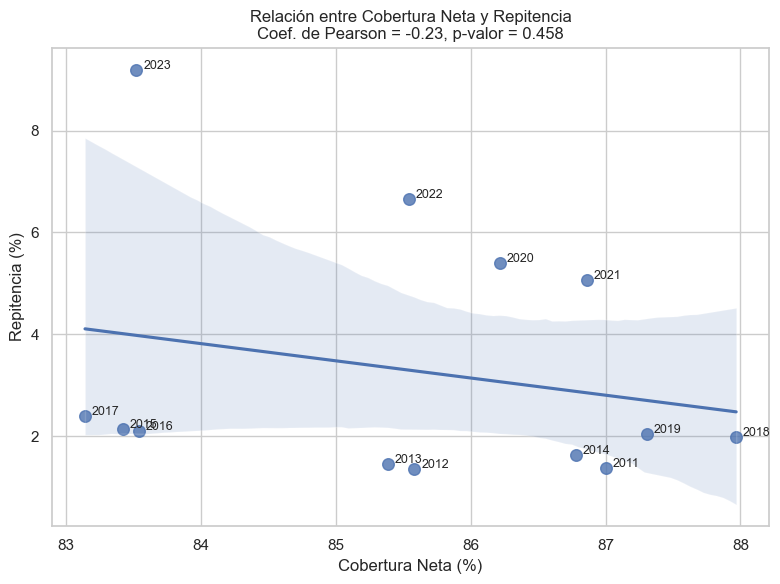

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Suponiendo que df es tu DataFrame original
# Agrupar por año y calcular el promedio de las columnas relevantes
df_mean = df.groupby('AÑO')[['COBERTURA_NETA', 'REPITENCIA']].mean().reset_index()

# Cálculo de la correlación de Pearson
r, p = pearsonr(df_mean['COBERTURA_NETA'], df_mean['REPITENCIA'])

# Visualización con regresión lineal
plt.figure(figsize=(8,6))
sns.regplot(x='COBERTURA_NETA', y='REPITENCIA', data=df_mean, ci=95, scatter_kws={'s': 70})

# Añadir etiquetas de año a cada punto
for i in range(df_mean.shape[0]):
    plt.text(df_mean['COBERTURA_NETA'].iloc[i] + 0.05,
             df_mean['REPITENCIA'].iloc[i] + 0.02,
             str(int(df_mean['AÑO'].iloc[i])),
             fontsize=9)

# Títulos y ejes
plt.title(f'Relación entre Cobertura Neta y Repitencia\nCoef. de Pearson = {r:.2f}, p-valor = {p:.3f}')
plt.xlabel('Cobertura Neta (%)')
plt.ylabel('Repitencia (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


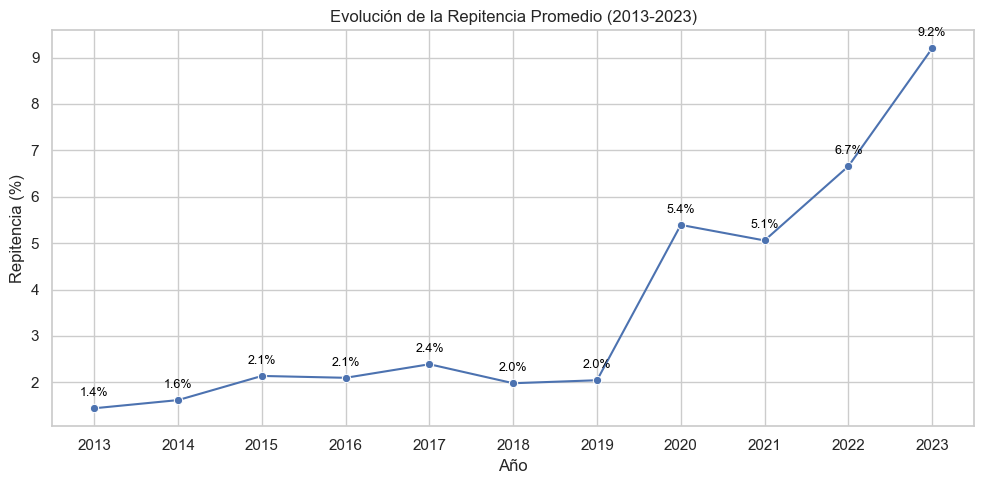

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Paso 1: Agrupar por año y sacar el promedio de repitencia
df_agg = df_decada.groupby('AÑO')['REPITENCIA'].mean().reset_index()

# Paso 2: Graficar línea con un punto por año
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_agg, x='AÑO', y='REPITENCIA', marker='o', errorbar=None)

# Paso 3: Ajustar ejes
plt.title('Evolución de la Repitencia Promedio (2013-2023)')
plt.xlabel('Año')
plt.ylabel('Repitencia (%)')
plt.xticks(ticks=range(2013, 2024))  # Mostrar todos los años

# Paso 4: Agregar etiquetas en cada punto
for i, row in df_agg.iterrows():
    plt.text(row['AÑO'], row['REPITENCIA'] + 0.2,
             f"{row['REPITENCIA']:.1f}%",
             ha='center', va='bottom', fontsize=9, color='black')

plt.grid(True)
plt.tight_layout()
plt.show()


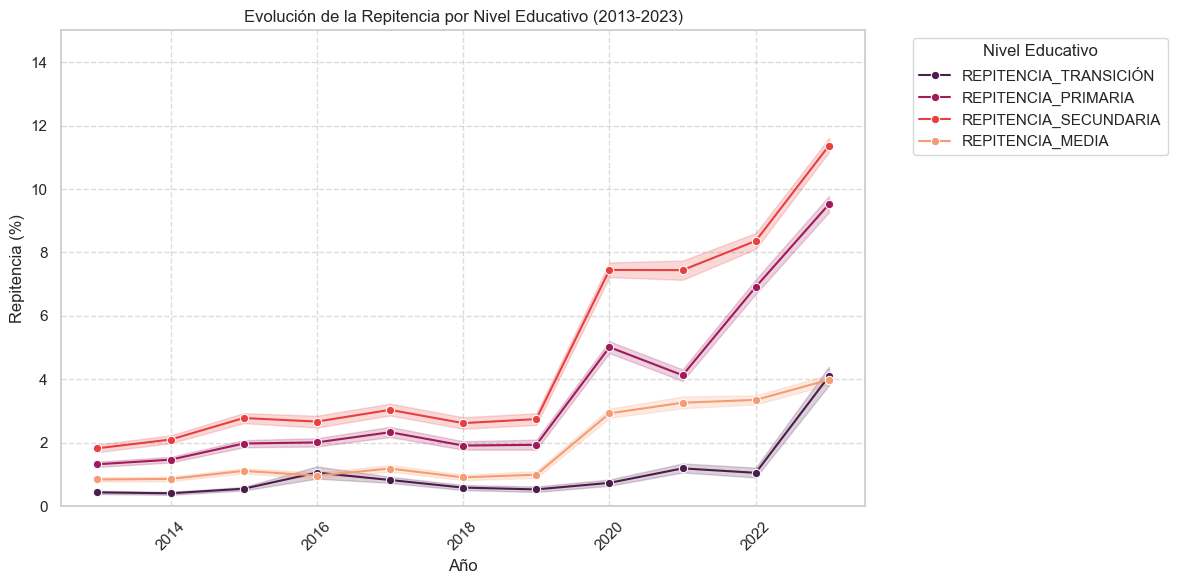

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Seleccionar columnas relevantes
niveles = [
    'REPITENCIA_TRANSICIÓN',
    'REPITENCIA_PRIMARIA', 
    'REPITENCIA_SECUNDARIA', 
    'REPITENCIA_MEDIA'
]

# Verificar que las columnas existan en el DataFrame
columnas_disponibles = df_decada.columns.tolist()
columnas_a_usar = ['AÑO'] + [col for col in niveles if col in columnas_disponibles]

# 2. Filtrar el DataFrame
df_niveles = df_decada[columnas_a_usar].copy()

# 3. Derretir el DataFrame para graficar
df_melted = df_niveles.melt(
    id_vars='AÑO',
    var_name='Nivel Educativo',
    value_name='Repitencia'
)

# 4. Configurar el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_melted, 
    x='AÑO',
    y='Repitencia',
    hue='Nivel Educativo',
    marker='o',
    palette='rocket'
)

# 5. Personalizar el gráfico
plt.title('Evolución de la Repitencia por Nivel Educativo (2013-2023)')
plt.ylabel('Repitencia (%)')
plt.xlabel('Año')
plt.ylim(0, 15)  # <-- Límite del eje Y ajustado al 15%
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Nivel Educativo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


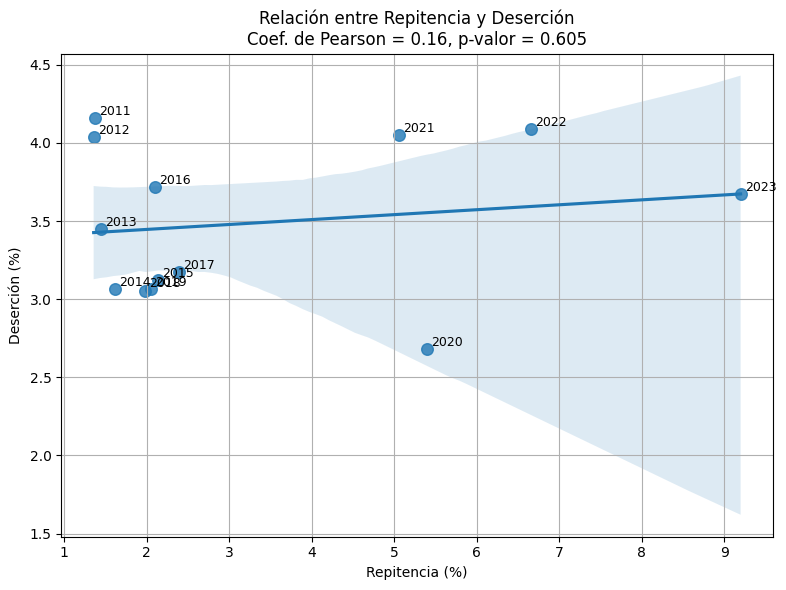

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Agrupar por año y calcular promedios
df_mean = df.groupby('AÑO')[['REPITENCIA', 'DESERCIÓN']].mean().reset_index()

# Cálculo de correlación de Pearson
r, p = pearsonr(df_mean['REPITENCIA'], df_mean['DESERCIÓN'])

# Visualización
plt.figure(figsize=(8,6))
sns.regplot(x='REPITENCIA', y='DESERCIÓN', data=df_mean, ci=95, scatter_kws={'s': 70})

# Etiquetas de año
for i in range(df_mean.shape[0]):
    plt.text(df_mean['REPITENCIA'].iloc[i] + 0.05,
             df_mean['DESERCIÓN'].iloc[i] + 0.02,
             str(int(df_mean['AÑO'].iloc[i])),
             fontsize=9)

# Título y ejes
plt.title(f'Relación entre Repitencia y Deserción\nCoef. de Pearson = {r:.2f}, p-valor = {p:.3f}')
plt.xlabel('Repitencia (%)')
plt.ylabel('Deserción (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


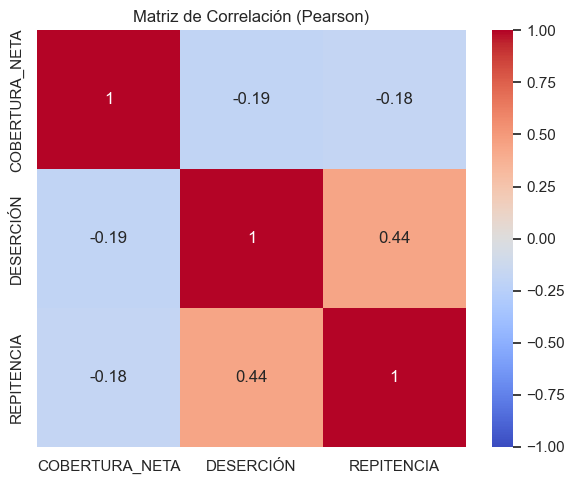

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por año y calcular promedio si no está hecho
df_mean = df_decada.groupby('AÑO')[['COBERTURA_NETA', 'DESERCIÓN', 'REPITENCIA']].mean().reset_index()

# Calcular la matriz de correlación
corr_matrix = df_mean[['COBERTURA_NETA', 'DESERCIÓN', 'REPITENCIA']].corr(method='pearson')

# Graficar como mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación (Pearson)')
plt.tight_layout()
plt.show()


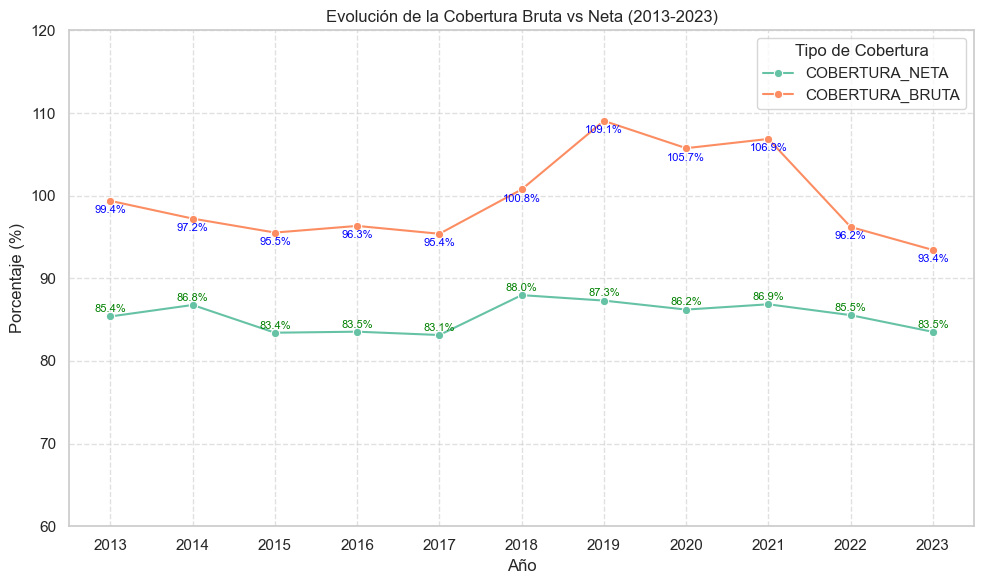

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Agrupar por año y calcular promedio de ambas coberturas
df_agg = df_decada.groupby('AÑO')[['COBERTURA_NETA', 'COBERTURA_BRUTA']].mean().reset_index()

# 2. Derretir para graficar en la misma figura
df_melted = df_agg.melt(id_vars='AÑO', 
                        value_vars=['COBERTURA_NETA', 'COBERTURA_BRUTA'],
                        var_name='Tipo de Cobertura',
                        value_name='Porcentaje')

# 3. Crear gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='AÑO', y='Porcentaje', hue='Tipo de Cobertura', marker='o', palette='Set2')

# 4. Ajustes estéticos
plt.title('Evolución de la Cobertura Bruta vs Neta (2013-2023)')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=range(2013, 2024))
plt.ylim(60, 120)  # Limite ajustado desde 60%
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Tipo de Cobertura')

# 5. Etiquetas en cada punto
for i, row in df_agg.iterrows():
    plt.text(row['AÑO'], row['COBERTURA_NETA'] + 0.5, f"{row['COBERTURA_NETA']:.1f}%", 
             color='green', ha='center', fontsize=8)
    plt.text(row['AÑO'], row['COBERTURA_BRUTA'] - 1.5, f"{row['COBERTURA_BRUTA']:.1f}%", 
             color='blue', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


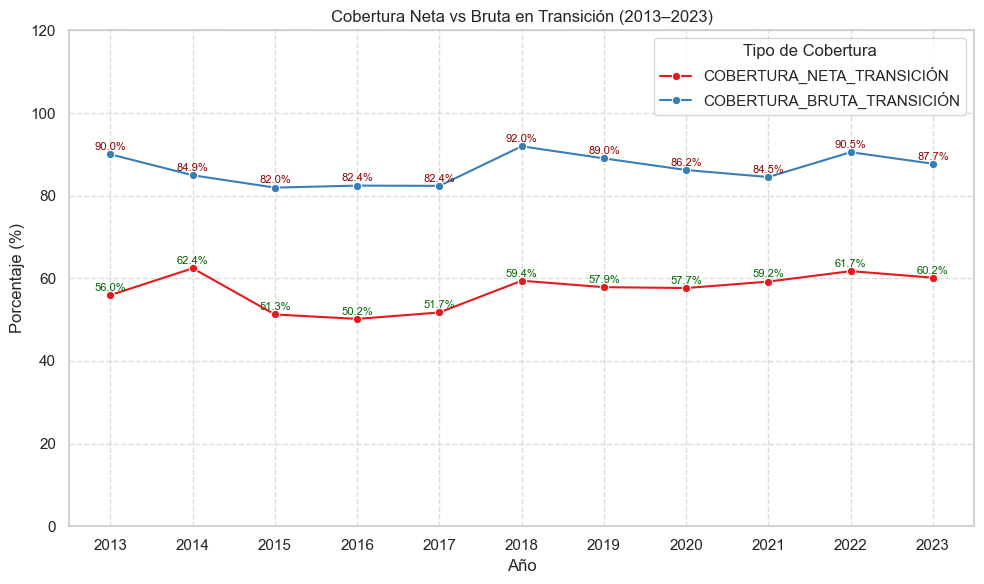

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Agrupar por año y calcular el promedio para transición
df_agg = df_decada.groupby('AÑO')[['COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_BRUTA_TRANSICIÓN']].mean().reset_index()

# 2. Reorganizar el dataframe para graficar ambas variables
df_melted = df_agg.melt(
    id_vars='AÑO',
    value_vars=['COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_BRUTA_TRANSICIÓN'],
    var_name='Tipo de Cobertura',
    value_name='Porcentaje'
)

# 3. Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_melted,
    x='AÑO',
    y='Porcentaje',
    hue='Tipo de Cobertura',
    marker='o',
    palette='Set1'
)

# 4. Personalización del gráfico
plt.title('Cobertura Neta vs Bruta en Transición (2013–2023)')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=range(2013, 2024))
plt.ylim(0, 120)  # Limite inferior desde 0
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Cobertura')

# 5. Etiquetas en los puntos
for i, row in df_agg.iterrows():
    plt.text(row['AÑO'], row['COBERTURA_NETA_TRANSICIÓN'] + 1,
             f"{row['COBERTURA_NETA_TRANSICIÓN']:.1f}%", 
             color='darkgreen', ha='center', fontsize=8)
    
    plt.text(row['AÑO'], row['COBERTURA_BRUTA_TRANSICIÓN'] + 1,
             f"{row['COBERTURA_BRUTA_TRANSICIÓN']:.1f}%", 
             color='darkred', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


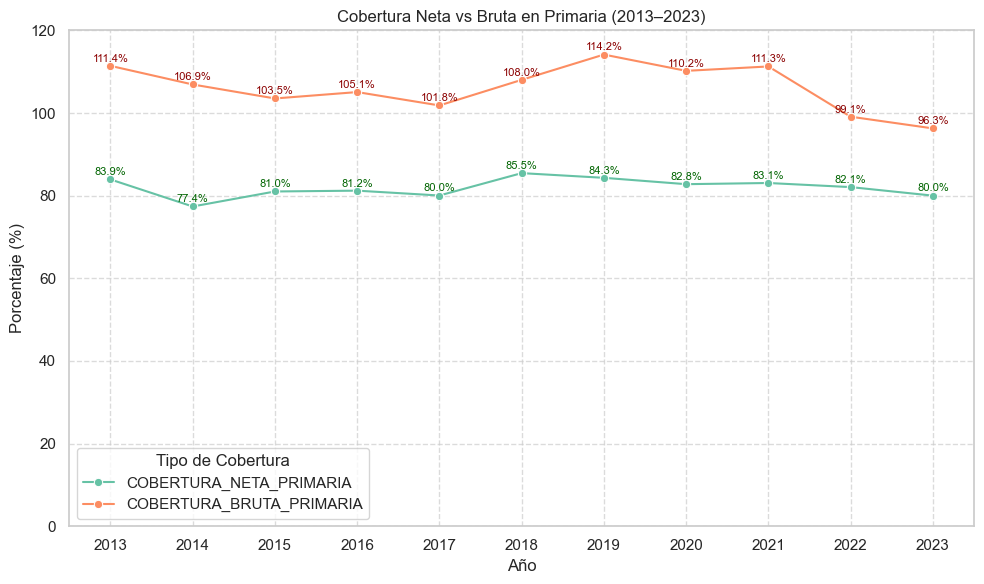

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Agrupar por año y calcular el promedio para primaria
df_agg = df_decada.groupby('AÑO')[['COBERTURA_NETA_PRIMARIA', 'COBERTURA_BRUTA_PRIMARIA']].mean().reset_index()

# 2. Reorganizar el dataframe para graficar ambas variables
df_melted = df_agg.melt(
    id_vars='AÑO',
    value_vars=['COBERTURA_NETA_PRIMARIA', 'COBERTURA_BRUTA_PRIMARIA'],
    var_name='Tipo de Cobertura',
    value_name='Porcentaje'
)

# 3. Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_melted,
    x='AÑO',
    y='Porcentaje',
    hue='Tipo de Cobertura',
    marker='o',
    palette='Set2'
)

# 4. Personalización del gráfico
plt.title('Cobertura Neta vs Bruta en Primaria (2013–2023)')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=range(2013, 2024))
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Cobertura')

# 5. Etiquetas en los puntos
for i, row in df_agg.iterrows():
    plt.text(row['AÑO'], row['COBERTURA_NETA_PRIMARIA'] + 1,
             f"{row['COBERTURA_NETA_PRIMARIA']:.1f}%", 
             color='darkgreen', ha='center', fontsize=8)
    
    plt.text(row['AÑO'], row['COBERTURA_BRUTA_PRIMARIA'] + 1,
             f"{row['COBERTURA_BRUTA_PRIMARIA']:.1f}%", 
             color='darkred', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


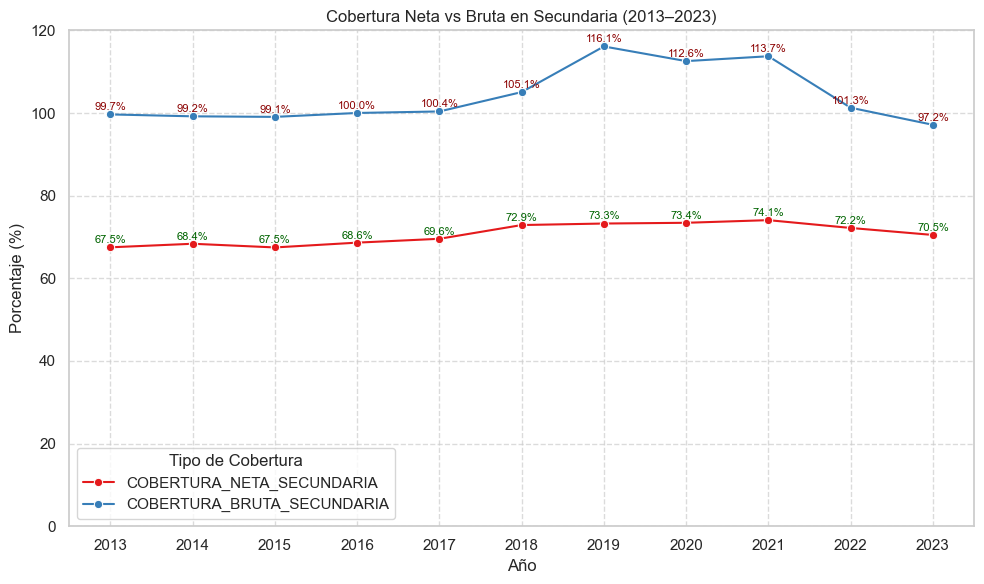

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Agrupar por año y calcular el promedio para secundaria
df_agg = df_decada.groupby('AÑO')[['COBERTURA_NETA_SECUNDARIA', 'COBERTURA_BRUTA_SECUNDARIA']].mean().reset_index()

# 2. Reorganizar el dataframe para graficar ambas variables
df_melted = df_agg.melt(
    id_vars='AÑO',
    value_vars=['COBERTURA_NETA_SECUNDARIA', 'COBERTURA_BRUTA_SECUNDARIA'],
    var_name='Tipo de Cobertura',
    value_name='Porcentaje'
)

# 3. Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_melted,
    x='AÑO',
    y='Porcentaje',
    hue='Tipo de Cobertura',
    marker='o',
    palette='Set1'
)

# 4. Personalización del gráfico
plt.title('Cobertura Neta vs Bruta en Secundaria (2013–2023)')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=range(2013, 2024))
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Cobertura')

# 5. Etiquetas en los puntos
for i, row in df_agg.iterrows():
    plt.text(row['AÑO'], row['COBERTURA_NETA_SECUNDARIA'] + 1,
             f"{row['COBERTURA_NETA_SECUNDARIA']:.1f}%",
             color='darkgreen', ha='center', fontsize=8)

    plt.text(row['AÑO'], row['COBERTURA_BRUTA_SECUNDARIA'] + 1,
             f"{row['COBERTURA_BRUTA_SECUNDARIA']:.1f}%",
             color='darkred', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


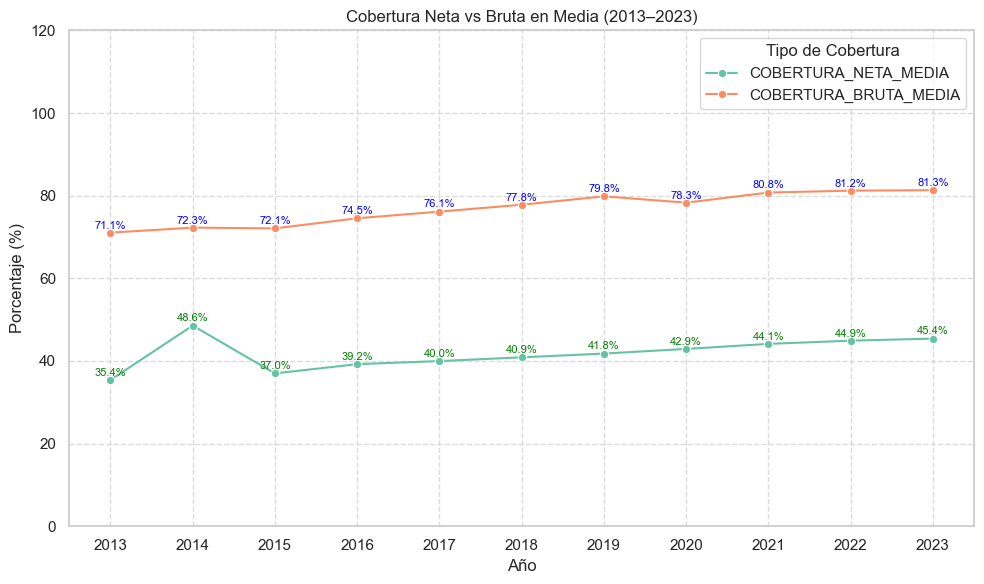

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Agrupar por año y calcular el promedio para educación media
df_agg = df_decada.groupby('AÑO')[['COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA_MEDIA']].mean().reset_index()

# 2. Reorganizar el DataFrame para graficar ambas coberturas
df_melted = df_agg.melt(
    id_vars='AÑO',
    value_vars=['COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA_MEDIA'],
    var_name='Tipo de Cobertura',
    value_name='Porcentaje'
)

# 3. Crear el gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_melted,
    x='AÑO',
    y='Porcentaje',
    hue='Tipo de Cobertura',
    marker='o',
    palette='Set2'
)

# 4. Personalización del gráfico
plt.title('Cobertura Neta vs Bruta en Media (2013–2023)')
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=range(2013, 2024))
plt.ylim(0, 120)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Cobertura')

# 5. Etiquetas en los puntos
for i, row in df_agg.iterrows():
    plt.text(row['AÑO'], row['COBERTURA_NETA_MEDIA'] + 1,
             f"{row['COBERTURA_NETA_MEDIA']:.1f}%",
             color='green', ha='center', fontsize=8)

    plt.text(row['AÑO'], row['COBERTURA_BRUTA_MEDIA'] + 1,
             f"{row['COBERTURA_BRUTA_MEDIA']:.1f}%",
             color='blue', ha='center', fontsize=8)

plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6432\1438338200.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


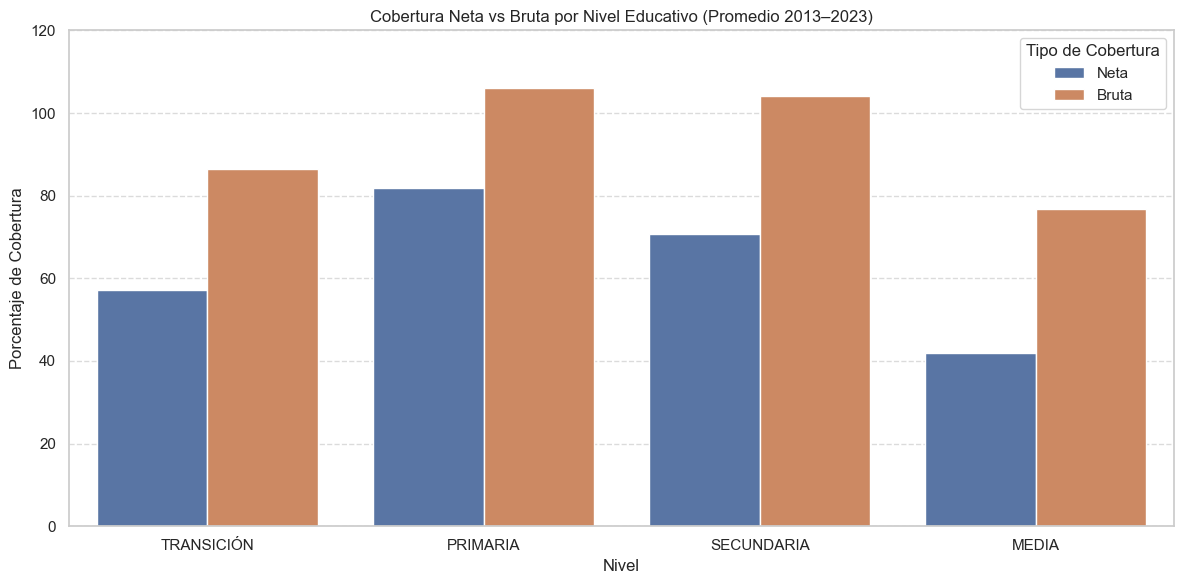

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas necesarias
columnas = [
    'AÑO',
    'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_BRUTA_TRANSICIÓN',
    'COBERTURA_NETA_PRIMARIA', 'COBERTURA_BRUTA_PRIMARIA',
    'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_BRUTA_SECUNDARIA',
    'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA_MEDIA'
]

# Agrupar por año y calcular promedios
df_agg = df_decada[columnas].groupby('AÑO').mean().reset_index()

# Derretir el DataFrame para formato largo
df_melted = pd.melt(
    df_agg,
    id_vars='AÑO',
    var_name='Tipo de Cobertura',
    value_name='Porcentaje'
)

# Extraer nivel educativo (TRANSICIÓN, PRIMARIA, etc.) y tipo (Neta o Bruta)
df_melted['Nivel'] = df_melted['Tipo de Cobertura'].apply(lambda x: x.split('_')[-1])
df_melted['Tipo'] = df_melted['Tipo de Cobertura'].apply(lambda x: 'Neta' if 'NETA' in x else 'Bruta')

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_melted,
    x='Nivel', y='Porcentaje', hue='Tipo', ci=None
)

plt.title('Cobertura Neta vs Bruta por Nivel Educativo (Promedio 2013–2023)')
plt.ylabel('Porcentaje de Cobertura')
plt.ylim(0, 120)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tipo de Cobertura')
plt.tight_layout()
plt.show()


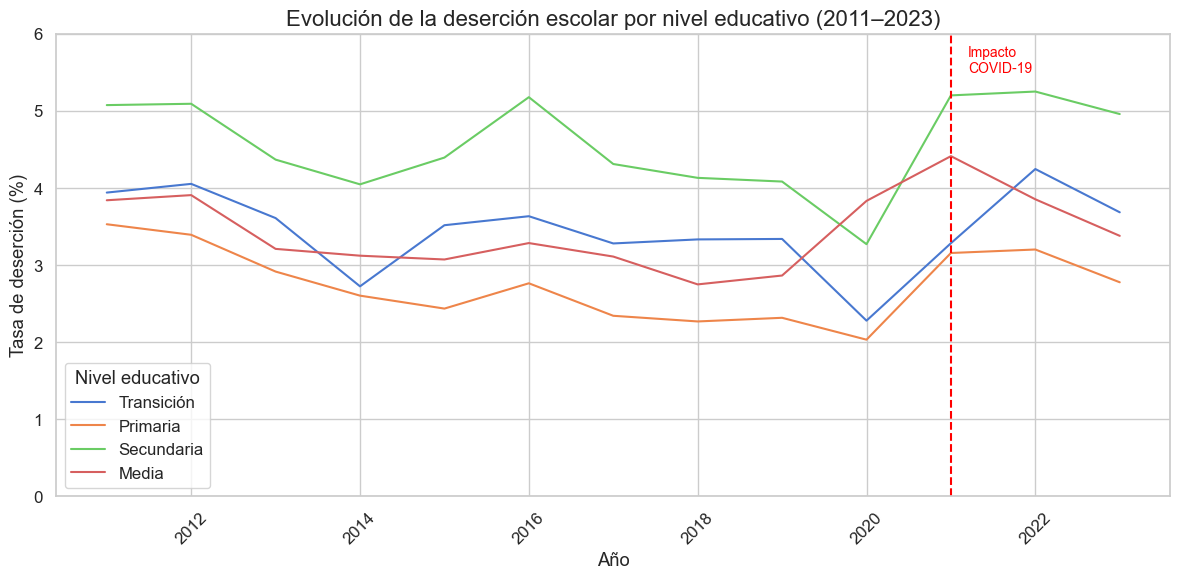

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo limpio
df = pd.read_csv("Datos_Cleaned.csv")

# Asegurar que 'AÑO' es numérico
df['AÑO'] = pd.to_numeric(df['AÑO'], errors='coerce')

# Agrupar por año y calcular promedio de deserción por nivel
desercion_por_nivel = df.groupby('AÑO')[[
    'DESERCIÓN_TRANSICIÓN',
    'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA',
    'DESERCIÓN_MEDIA'
]].mean().reset_index()

# Configurar estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Crear gráfico
plt.figure(figsize=(12, 6))
for columna in desercion_por_nivel.columns[1:]:
    sns.lineplot(data=desercion_por_nivel, x='AÑO', y=columna, label=columna.replace("DESERCIÓN_", "").capitalize())

# Personalizar gráfico
plt.title("Evolución de la deserción escolar por nivel educativo (2011–2023)", fontsize=16)
plt.xlabel("Año")
plt.ylabel("Tasa de deserción (%)")
plt.legend(title="Nivel educativo")
plt.xticks(rotation=45)
plt.ylim(0, 6)  # 🔁 Límite ajustado de 0 a 6

# Línea y texto por la pandemia
plt.axvline(x=2021, color='red', linestyle='--', linewidth=1.5)
plt.text(2021.2, 5.5, 'Impacto\nCOVID-19', color='red', fontsize=10)

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [51]:
import geopandas as gpd

mapa_colombia = gpd.read_file("colombia_departamentos.geojson")
print(mapa_colombia.columns)

Index(['DPTO_CCDGO', 'DPTO_CNMBR', 'DPTO_NANO_', 'DPTO_CACTO', 'DPTO_NANO',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')


In [52]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# 1. Leer el archivo GeoJSON
mapa_colombia = gpd.read_file("colombia_departamentos.geojson")
mapa_colombia['DPTO_CNMBR'] = mapa_colombia['DPTO_CNMBR'].str.upper()

# 2. Leer tus datos limpios
df = pd.read_csv("Datos_Cleaned.csv")
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

# 3. Agrupar por departamento (elige el indicador que prefieras)
df_dep = df.groupby('DEPARTAMENTO')[['DESERCIÓN_PRIMARIA']].mean().reset_index()

# 4. Unir datos con el mapa
mapa_completo = mapa_colombia.merge(df_dep, left_on='DPTO_CNMBR', right_on='DEPARTAMENTO')

# 5. Crear el mapa base
m = folium.Map(location=[4.6, -74.1], zoom_start=5, tiles='CartoDB positron')

# 6. Añadir capa coropleta con tooltip
choropleth = folium.Choropleth(
    geo_data=mapa_completo,
    data=mapa_completo,
    columns=['DPTO_CNMBR', 'DESERCIÓN_PRIMARIA'],
    key_on='feature.properties.DPTO_CNMBR',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Tasa de deserción primaria (%)'
).add_to(m)

# 7. Añadir tooltip para ver nombre y valor
folium.GeoJson(
    mapa_completo,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.3},
    tooltip=GeoJsonTooltip(
        fields=['DPTO_CNMBR', 'DESERCIÓN_PRIMARIA'],
        aliases=['Departamento:', 'Deserción primaria:'],
        localize=True
    )
).add_to(m)

# 8. Mostrar el mapa
m

In [53]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# 1. Leer el archivo GeoJSON
mapa_colombia = gpd.read_file("colombia_departamentos.geojson")
mapa_colombia['DPTO_CNMBR'] = mapa_colombia['DPTO_CNMBR'].str.upper()

# 2. Leer tus datos limpios
df = pd.read_csv("Datos_Cleaned.csv")
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

# 3. Agrupar por departamento (transición)
df_dep = df.groupby('DEPARTAMENTO')[['DESERCIÓN_TRANSICIÓN']].mean().reset_index()

# 4. Unir datos con el mapa
mapa_completo = mapa_colombia.merge(df_dep, left_on='DPTO_CNMBR', right_on='DEPARTAMENTO')

# 5. Crear el mapa base
m = folium.Map(location=[4.6, -74.1], zoom_start=5, tiles='CartoDB positron')

# 6. Añadir capa coropleta con tooltip
choropleth = folium.Choropleth(
    geo_data=mapa_completo,
    data=mapa_completo,
    columns=['DPTO_CNMBR', 'DESERCIÓN_TRANSICIÓN'],
    key_on='feature.properties.DPTO_CNMBR',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Tasa de deserción transición (%)'
).add_to(m)

# 7. Añadir tooltip para ver nombre y valor
folium.GeoJson(
    mapa_completo,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.3},
    tooltip=GeoJsonTooltip(
        fields=['DPTO_CNMBR', 'DESERCIÓN_TRANSICIÓN'],
        aliases=['Departamento:', 'Deserción transición:'],
        localize=True
    )
).add_to(m)

# 8. Mostrar el mapa
m

In [54]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# 1. Leer el archivo GeoJSON
mapa_colombia = gpd.read_file("colombia_departamentos.geojson")
mapa_colombia['DPTO_CNMBR'] = mapa_colombia['DPTO_CNMBR'].str.upper()

# 2. Leer tus datos limpios
df = pd.read_csv("Datos_Cleaned.csv")
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

# 3. Agrupar por departamento (media)
df_dep = df.groupby('DEPARTAMENTO')[['DESERCIÓN_MEDIA']].mean().reset_index()

# 4. Unir datos con el mapa
mapa_completo = mapa_colombia.merge(df_dep, left_on='DPTO_CNMBR', right_on='DEPARTAMENTO')

# 5. Crear el mapa base
m = folium.Map(location=[4.6, -74.1], zoom_start=5, tiles='CartoDB positron')

# 6. Añadir capa coropleta con tooltip
choropleth = folium.Choropleth(
    geo_data=mapa_completo,
    data=mapa_completo,
    columns=['DPTO_CNMBR', 'DESERCIÓN_MEDIA'],
    key_on='feature.properties.DPTO_CNMBR',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Tasa de deserción media (%)'
).add_to(m)

# 7. Añadir tooltip para ver nombre y valor
folium.GeoJson(
    mapa_completo,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.3},
    tooltip=GeoJsonTooltip(
        fields=['DPTO_CNMBR', 'DESERCIÓN_MEDIA'],
        aliases=['Departamento:', 'Deserción media:'],
        localize=True
    )
).add_to(m)

# 8. Mostrar el mapa
m

In [55]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# 1. Leer el archivo GeoJSON
mapa_colombia = gpd.read_file("colombia_departamentos.geojson")
mapa_colombia['DPTO_CNMBR'] = mapa_colombia['DPTO_CNMBR'].str.upper()

# 2. Leer tus datos limpios
df = pd.read_csv("Datos_Cleaned.csv")
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

# 3. Agrupar por departamento (secundaria)
df_dep = df.groupby('DEPARTAMENTO')[['DESERCIÓN_SECUNDARIA']].mean().reset_index()

# 4. Unir datos con el mapa
mapa_completo = mapa_colombia.merge(df_dep, left_on='DPTO_CNMBR', right_on='DEPARTAMENTO')

# 5. Crear el mapa base
m = folium.Map(location=[4.6, -74.1], zoom_start=5, tiles='CartoDB positron')

# 6. Añadir capa coropleta con tooltip
choropleth = folium.Choropleth(
    geo_data=mapa_completo,
    data=mapa_completo,
    columns=['DPTO_CNMBR', 'DESERCIÓN_SECUNDARIA'],
    key_on='feature.properties.DPTO_CNMBR',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Tasa de deserción secundaria (%)'
).add_to(m)

# 7. Añadir tooltip para ver nombre y valor
folium.GeoJson(
    mapa_completo,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.3},
    tooltip=GeoJsonTooltip(
        fields=['DPTO_CNMBR', 'DESERCIÓN_SECUNDARIA'],
        aliases=['Departamento:', 'Deserción secundaria:'],
        localize=True
    )
).add_to(m)

# 8. Mostrar el mapa
m

In [56]:
import pandas as pd
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# 1. Leer el archivo GeoJSON
mapa_colombia = gpd.read_file("colombia_departamentos.geojson")
mapa_colombia['DPTO_CNMBR'] = mapa_colombia['DPTO_CNMBR'].str.upper()

# 2. Leer los datos limpios
df = pd.read_csv("Datos_Cleaned.csv")
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

# 3. Calcular la deserción promedio por departamento (promedio de todos los niveles)
df['PROMEDIO_DESERCION'] = df[[
    'DESERCIÓN_TRANSICIÓN',
    'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA',
    'DESERCIÓN_MEDIA'
]].mean(axis=1)

df_dep = df.groupby('DEPARTAMENTO')[['PROMEDIO_DESERCION']].mean().reset_index()

# 4. Unir con el mapa
mapa_completo = mapa_colombia.merge(df_dep, left_on='DPTO_CNMBR', right_on='DEPARTAMENTO')

# 5. Crear el mapa base
m = folium.Map(location=[4.6, -74.1], zoom_start=5, tiles='CartoDB positron')

# 6. Añadir capa coropleta
choropleth = folium.Choropleth(
    geo_data=mapa_completo,
    data=mapa_completo,
    columns=['DPTO_CNMBR', 'PROMEDIO_DESERCION'],
    key_on='feature.properties.DPTO_CNMBR',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Tasa promedio de deserción escolar (%)'
).add_to(m)

# 7. Añadir tooltip
folium.GeoJson(
    mapa_completo,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.3},
    tooltip=GeoJsonTooltip(
        fields=['DPTO_CNMBR', 'PROMEDIO_DESERCION'],
        aliases=['Departamento:', 'Deserción promedio:'],
        localize=True
    )
).add_to(m)

# 8. Mostrar el mapa
m

In [58]:
import pandas as pd

# Cargar datos
df = pd.read_csv("Datos_Cleaned.csv")
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

# Asegurar que 'AÑO' es numérico
df['AÑO'] = pd.to_numeric(df['AÑO'], errors='coerce')

# Calcular la tasa promedio de deserción por fila (todas las etapas)
df['PROMEDIO_DESERCION'] = df[[
    'DESERCIÓN_TRANSICIÓN',
    'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA',
    'DESERCIÓN_MEDIA'
]].mean(axis=1)

# Filtrar por 2011 y 2023
df_2011 = df[df['AÑO'] == 2011].groupby('DEPARTAMENTO')['PROMEDIO_DESERCION'].mean().reset_index(name='TASA_2011')
df_2023 = df[df['AÑO'] == 2023].groupby('DEPARTAMENTO')['PROMEDIO_DESERCION'].mean().reset_index(name='TASA_2023')

# Unir ambos
cambio = pd.merge(df_2011, df_2023, on='DEPARTAMENTO', how='inner')

# Calcular la diferencia (2023 - 2011)
cambio['DIFERENCIA'] = cambio['TASA_2023'] - cambio['TASA_2011']

# Ordenar por mejora (más negativa)
mejoraron = cambio.sort_values(by='DIFERENCIA')
empeoraron = cambio.sort_values(by='DIFERENCIA', ascending=False)

# Mostrar resultados
print("📉 Departamentos que MÁS HAN MEJORADO:")
print(mejoraron.head())

print("\n📈 Departamentos que MÁS HAN EMPEORADO:")
print(empeoraron.head())

📉 Departamentos que MÁS HAN MEJORADO:
    DEPARTAMENTO  TASA_2011  TASA_2023  DIFERENCIA
22        NARIÑO   4.820859   1.841211   -2.979648
28         SUCRE   5.669904   3.298750   -2.371154
5   BOGOTÁ, D.C.   4.965000   2.815000   -2.150000
12         CESAR   6.907000   4.886600   -2.020400
8         CALDAS   4.785926   3.217315   -1.568611

📈 Departamentos que MÁS HAN EMPEORADO:
   DEPARTAMENTO  TASA_2011  TASA_2023  DIFERENCIA
9       CAQUETÁ   3.521406   6.712813    3.191406
2        ARAUCA   2.426786   4.977500    2.550714
24     PUTUMAYO   3.787692   5.525577    1.737885
16      GUAINÍA   5.210000   6.353438    1.143438
11        CAUCA   2.769643   3.880060    1.110417


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


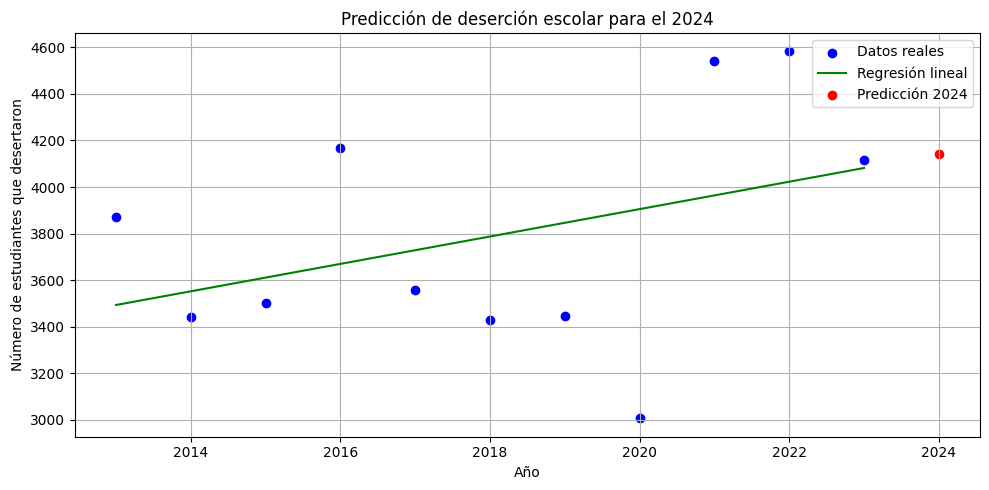

Predicción para el año 2024: 4140 estudiantes desertarían.


In [11]:
# Paso 1: Importar librerías necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Paso 2: Cargar el archivo CSV
df = pd.read_csv("Datos_Cleaned.csv")  # Asegúrate de tener el archivo en la misma carpeta que el notebook

# Paso 3: Filtrar desde el año 2013
df['AÑO'] = df['AÑO'].astype(int)
df_filtrado = df[df['AÑO'] >= 2013]

# Paso 4: Agrupar por año y sumar la deserción total
desercion_anual = df_filtrado.groupby('AÑO')['DESERCIÓN'].sum().reset_index()

# Paso 5: Preparar variables para la regresión
X = desercion_anual[['AÑO']]
y = desercion_anual['DESERCIÓN']

# Paso 6: Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Paso 7: Predecir para el próximo año
año_siguiente = X['AÑO'].max() + 1
prediccion = modelo.predict([[año_siguiente]])

# Paso 8: Graficar los resultados
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, modelo.predict(X), color='green', label='Regresión lineal')
plt.scatter(año_siguiente, prediccion, color='red', label=f'Predicción {año_siguiente}')
plt.xlabel('Año')
plt.ylabel('Número de estudiantes que desertaron')
plt.title('Predicción de deserción escolar para el 2024')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Paso 9: Mostrar predicción
print(f"Predicción para el año {año_siguiente}: {int(prediccion[0])} estudiantes desertarían.")


✅ Predicción de COBERTURA_NETA para 2024: 85.73%


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


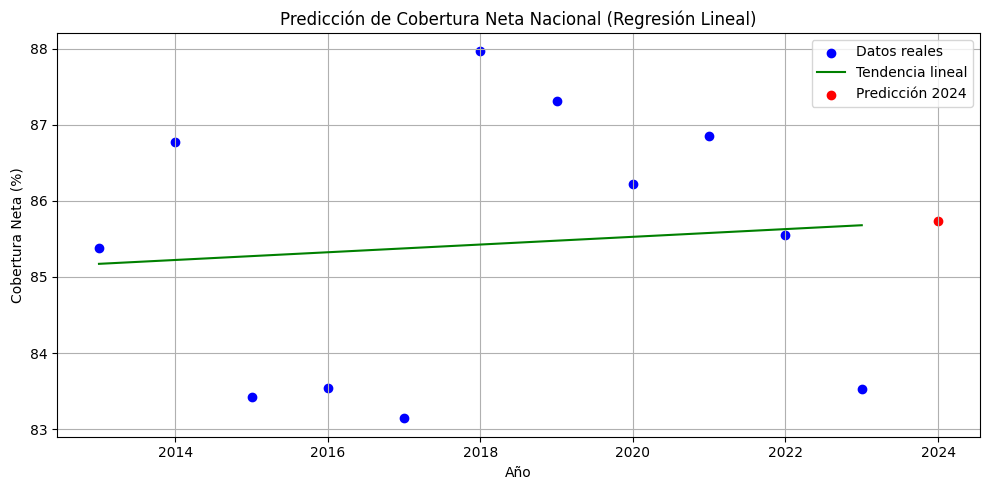

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("Datos_Cleaned.csv")
df['AÑO'] = pd.to_numeric(df['AÑO'], errors='coerce')

# Filtrar de 2013 en adelante
df_filtrado = df[df['AÑO'] >= 2013]

# Agrupar por año y calcular la cobertura neta promedio nacional
cobertura_anual = df_filtrado.groupby('AÑO')['COBERTURA_NETA'].mean().reset_index()

# Preparar variables para el modelo
X = cobertura_anual[['AÑO']]
y = cobertura_anual['COBERTURA_NETA']

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir cobertura para 2024
año_prediccion = X['AÑO'].max() + 1
prediccion_2024 = modelo.predict([[año_prediccion]])[0]

# Mostrar la predicción
print(f"✅ Predicción de COBERTURA_NETA para {año_prediccion}: {prediccion_2024:.2f}%")

# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Datos reales', color='blue')
plt.plot(X, modelo.predict(X), color='green', label='Tendencia lineal')
plt.scatter(año_prediccion, prediccion_2024, color='red', label=f'Predicción {año_prediccion}')
plt.xlabel('Año')
plt.ylabel('Cobertura Neta (%)')
plt.title('Predicción de Cobertura Neta Nacional (Regresión Lineal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


✅ Predicción de REPITENCIA para 2024: 7.67%


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


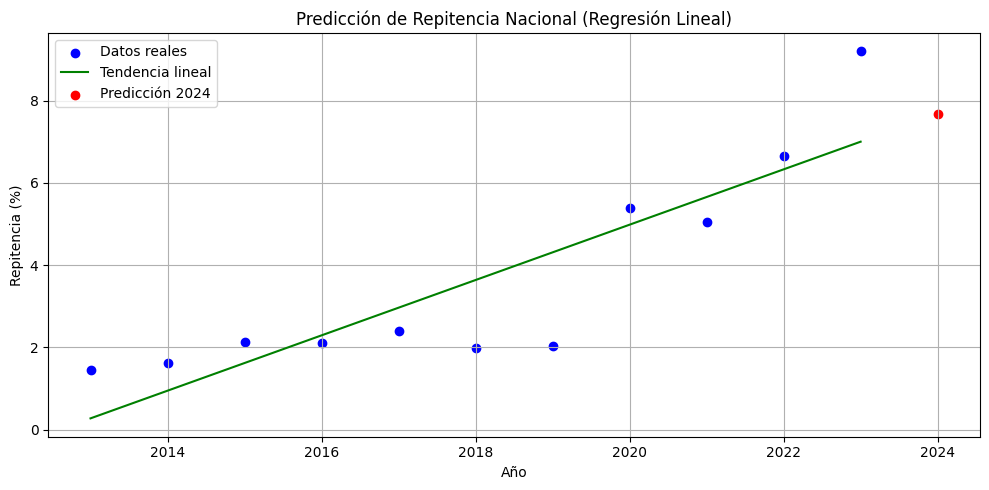

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv("Datos_Cleaned.csv")
df['AÑO'] = pd.to_numeric(df['AÑO'], errors='coerce')

# Filtrar de 2013 en adelante
df_filtrado = df[df['AÑO'] >= 2013]

# Agrupar por año y calcular la repitencia promedio nacional
repitencia_anual = df_filtrado.groupby('AÑO')['REPITENCIA'].mean().reset_index()

# Preparar variables para el modelo
X = repitencia_anual[['AÑO']]
y = repitencia_anual['REPITENCIA']

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir repitencia para 2024
año_prediccion = X['AÑO'].max() + 1
prediccion_2024 = modelo.predict([[año_prediccion]])[0]

# Mostrar la predicción
print(f"✅ Predicción de REPITENCIA para {año_prediccion}: {prediccion_2024:.2f}%")

# Visualizar los resultados
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='Datos reales', color='blue')
plt.plot(X, modelo.predict(X), color='green', label='Tendencia lineal')
plt.scatter(año_prediccion, prediccion_2024, color='red', label=f'Predicción {año_prediccion}')
plt.xlabel('Año')
plt.ylabel('Repitencia (%)')
plt.title('Predicción de Repitencia Nacional (Regresión Lineal)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd 
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip

# 1. Leer el archivo GeoJSON
mapa_colombia = gpd.read_file("colombia_departamentos.geojson")
mapa_colombia['DPTO_CNMBR'] = mapa_colombia['DPTO_CNMBR'].str.upper()

# 2. Leer los datos limpios
df = pd.read_csv("Datos_Cleaned.csv")
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].str.upper()

# 3. Calcular la deserción promedio por departamento (promedio de todos los niveles)
df['PROMEDIO_DESERCION'] = df[[ 
    'DESERCIÓN_TRANSICIÓN',
    'DESERCIÓN_PRIMARIA',
    'DESERCIÓN_SECUNDARIA',
    'DESERCIÓN_MEDIA'
]].mean(axis=1)

df_dep = df.groupby('DEPARTAMENTO')[['PROMEDIO_DESERCION']].mean().reset_index()

# 4. Unir con el mapa
mapa_completo = mapa_colombia.merge(df_dep, left_on='DPTO_CNMBR', right_on='DEPARTAMENTO')

# 5. Crear el mapa base
m = folium.Map(location=[4.6, -74.1], zoom_start=5, tiles='CartoDB positron')

# 6. Añadir capa coropleta
choropleth = folium.Choropleth(
    geo_data=mapa_completo,
    data=mapa_completo,
    columns=['DPTO_CNMBR', 'PROMEDIO_DESERCION'],
    key_on='feature.properties.DPTO_CNMBR',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='Tasa promedio de deserción escolar (%)'
).add_to(m)

# 7. Añadir tooltip
folium.GeoJson(
    mapa_completo,
    style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 0.3},
    tooltip=GeoJsonTooltip(
        fields=['DPTO_CNMBR', 'PROMEDIO_DESERCION'],
        aliases=['Departamento:', 'Deserción promedio:'],
        localize=True
    )
).add_to(m)

# 8. Etiquetar los 5 departamentos con más deserción y los 4 con menos

# Obtener los top y bottom
top5 = mapa_completo.nlargest(5, 'PROMEDIO_DESERCION')
bottom4 = mapa_completo.nsmallest(4, 'PROMEDIO_DESERCION')

# Función para obtener centroides
def get_centroid(geom):
    return geom.centroid.y, geom.centroid.x

# Agregar etiquetas visibles para los 5 con más deserción (rojo)
for _, row in top5.iterrows():
    lat, lon = get_centroid(row['geometry'])
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 10px; color: red; font-weight: bold;">
                        {row['DPTO_CNMBR']}<br>{row['PROMEDIO_DESERCION']:.2f}%
                     </div>"""
        )
    ).add_to(m)

# Agregar etiquetas visibles para los 4 con menos deserción (verde)
for _, row in bottom4.iterrows():
    lat, lon = get_centroid(row['geometry'])
    folium.Marker(
        location=[lat, lon],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 10px; color: green; font-weight: bold;">
                        {row['DPTO_CNMBR']}<br>{row['PROMEDIO_DESERCION']:.2f}%
                     </div>"""
        )
    ).add_to(m)

# 9. Mostrar el mapa
m


c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


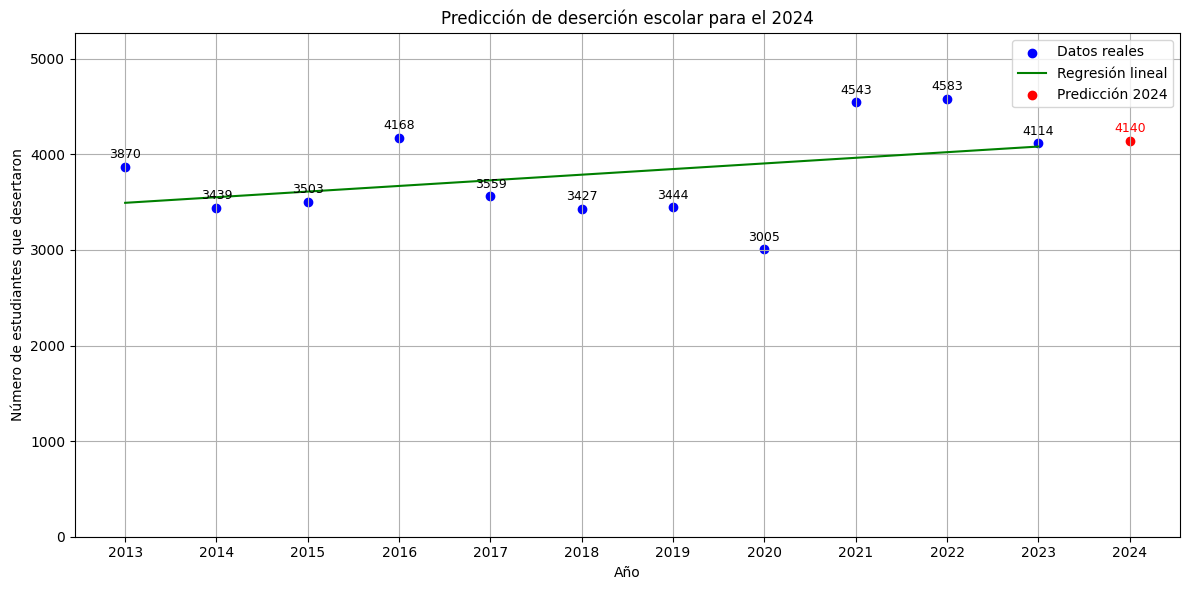

Predicción para el año 2024: 4140 estudiantes desertarían.


In [13]:
# Paso 1: Importar librerías necesarias
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Paso 2: Cargar el archivo CSV
df = pd.read_csv("Datos_Cleaned.csv")

# Paso 3: Filtrar desde el año 2013
df['AÑO'] = df['AÑO'].astype(int)
df_filtrado = df[df['AÑO'] >= 2013]

# Paso 4: Agrupar por año y sumar la deserción total
desercion_anual = df_filtrado.groupby('AÑO')['DESERCIÓN'].sum().reset_index()

# Paso 5: Preparar variables para la regresión
X = desercion_anual[['AÑO']]
y = desercion_anual['DESERCIÓN']

# Paso 6: Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Paso 7: Predecir para el próximo año
año_siguiente = X['AÑO'].max() + 1
prediccion = modelo.predict([[año_siguiente]])

# Paso 8: Graficar los resultados con etiquetas y mejor distribución
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, modelo.predict(X), color='green', label='Regresión lineal')
plt.scatter(año_siguiente, prediccion, color='red', label=f'Predicción {año_siguiente}')

# Añadir etiquetas de valor sobre los puntos
for i in range(len(X)):
    plt.text(X.iloc[i, 0], y.iloc[i] + y.max() * 0.02, f"{int(y.iloc[i])}", ha='center', fontsize=9)

# Etiqueta para el punto predicho
plt.text(año_siguiente, prediccion[0] + y.max() * 0.02, f"{int(prediccion[0])}", ha='center', fontsize=9, color='red')

# Ajustes visuales
plt.xlabel('Año')
plt.ylabel('Número de estudiantes que desertaron')
plt.title('Predicción de deserción escolar para el 2024')
plt.ylim(0, y.max() * 1.15)  # Expande el eje Y para mejor visualización
plt.xticks(range(X['AÑO'].min(), año_siguiente + 1))  # Ticks anuales
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Paso 9: Mostrar predicción
print(f"Predicción para el año {año_siguiente}: {int(prediccion[0])} estudiantes desertarían.")
